In [16]:
import torch
from torchvision import models

In [4]:
dir(models)

['AlexNet',
 'DenseNet',
 'GoogLeNet',
 'GoogLeNetOutputs',
 'Inception3',
 'InceptionOutputs',
 'MNASNet',
 'MobileNetV2',
 'ResNet',
 'ShuffleNetV2',
 'SqueezeNet',
 'VGG',
 '_GoogLeNetOutputs',
 '_InceptionOutputs',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_utils',
 'alexnet',
 'densenet',
 'densenet121',
 'densenet161',
 'densenet169',
 'densenet201',
 'detection',
 'googlenet',
 'inception',
 'inception_v3',
 'mnasnet',
 'mnasnet0_5',
 'mnasnet0_75',
 'mnasnet1_0',
 'mnasnet1_3',
 'mobilenet',
 'mobilenet_v2',
 'quantization',
 'resnet',
 'resnet101',
 'resnet152',
 'resnet18',
 'resnet34',
 'resnet50',
 'resnext101_32x8d',
 'resnext50_32x4d',
 'segmentation',
 'shufflenet_v2_x0_5',
 'shufflenet_v2_x1_0',
 'shufflenet_v2_x1_5',
 'shufflenet_v2_x2_0',
 'shufflenetv2',
 'squeezenet',
 'squeezenet1_0',
 'squeezenet1_1',
 'utils',
 'vgg',
 'vgg11',
 'vgg11_bn',
 'vgg13',
 'vgg13_bn',
 'vgg16',
 'vg

## AlexNet

In [5]:
alexnet = models.AlexNet()

## ResNet

In [6]:
resnet101 = models.resnet101(pretrained=True)

Downloading: "https://download.pytorch.org/models/resnet101-5d3b4d8f.pth" to C:\Users\neeraj/.cache\torch\hub\checkpoints\resnet101-5d3b4d8f.pth


### Load and Preprocess Image

In [7]:
from torchvision import transforms

In [8]:
preprocess = transforms.Compose([
                                    transforms.Resize(256),
                                    transforms.CenterCrop(224),
                                    transforms.ToTensor(),
                                    transforms.Normalize(
                                    mean=[0.485, 0.456, 0.406],
                                    std=[0.229, 0.224, 0.225]
                                )])

In [9]:
image_path = "images/cat_img.jpg"

In [10]:
from PIL import Image

In [11]:
cat_img = Image.open(image_path)

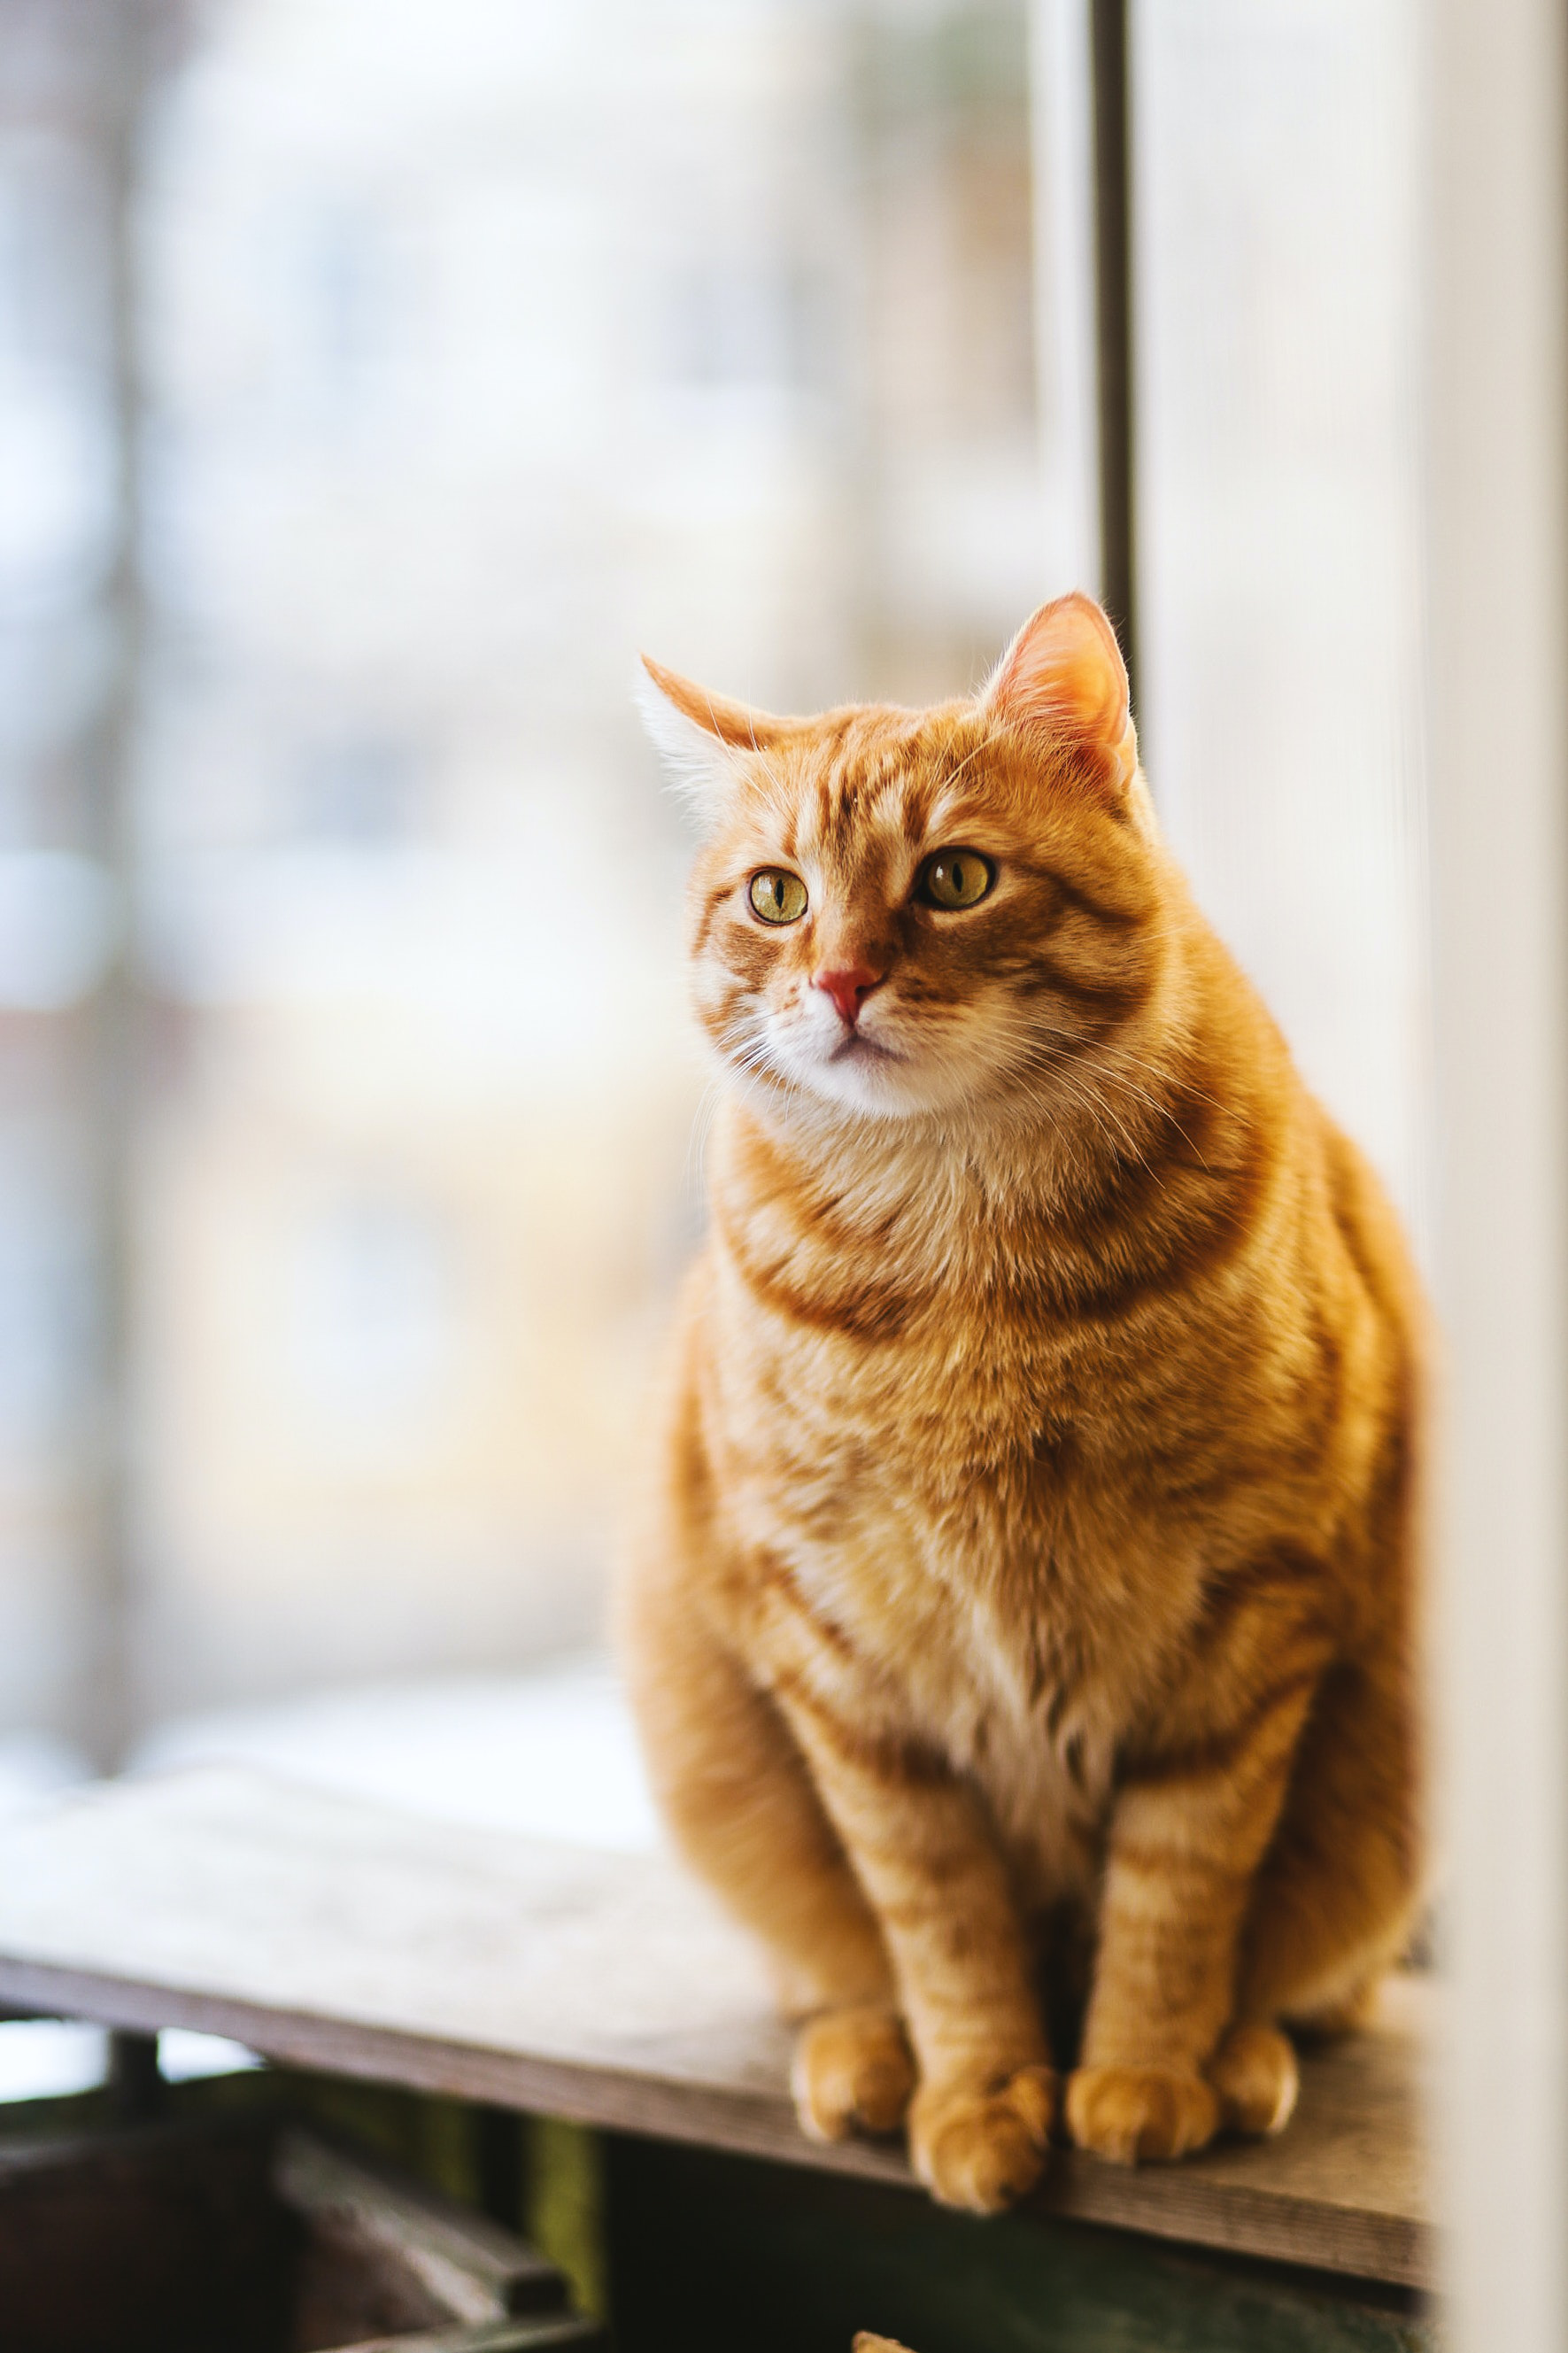

In [12]:
cat_img

In [13]:
# transform image
cat_img_t = preprocess(cat_img)

In [15]:
cat_img_t.shape

torch.Size([3, 224, 224])

In [17]:
# batch the image
cat_img_batch = torch.unsqueeze(cat_img_t, 0)

In [18]:
cat_img_batch.shape

torch.Size([1, 3, 224, 224])

In [20]:
# set resnet in eval mode
resnet101.eval()

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [21]:
out = resnet101(cat_img_batch)

In [26]:
# load imagenet labels
with open('./imagenet_classes.txt') as f:
    labels = [line.strip() for line in f.readlines()]

In [27]:
# get argmax of the output, or the index of the prediction with maximum score
_, index = torch.max(out, 1)

In [28]:
# get confidence percentage
confidence_percentage = torch.nn.functional.softmax(out, dim=1)[0] * 100
labels[index[0]], confidence_percentage[index[0]].item()

('tiger cat', 46.05174255371094)

In [29]:
# get top predictions
_, indices = torch.sort(out, descending=True)
[(labels[idx], confidence_percentage[idx].item()) for idx in indices[0][:5]]

[('tiger cat', 46.05174255371094),
 ('Egyptian cat', 37.175235748291016),
 ('tabby, tabby cat', 10.865118026733398),
 ('tiger, Panthera tigris', 0.4653235077857971),
 ('hamper', 0.263370156288147)]